###### Content under Creative Commons Attribution license CC-BY 4.0, code under BSD 3-Clause License © 2020 L.A. Barba, N.C. Clementi

# The simplicity of the complex

Welcome to a new module of the _Engineering Computations_ series! In this module, we lay a foundation for learning about Fourier series and Fourier transforms in science and engineering. 
The applications of these mathematical tools are vast: signal processing, acoustics, astronomy, statistics, even medical imaging, and music synthesis! 

But before we delve into it, we need to know a little about **complex numbers**, and this "lesson zero" of the module aims to give you a simple introduction or refresher to them.

## What are complex numbers?

One of our favorite YouTubers, Grant Sanderson, did a live stream on 24 April 2020 on ["Complex number fundamantals,"](https://www.youtube.com/watch?v=5PcpBw5Hbwo) and we highly recommend the video!

Let's review. When you learned about taking _powers_ of numbers, you found that every time you _square_ a number, the result is positive—whether the number is positive or negative. E.g., $5^2=25$ and $(-5)^2=25$.

At some point in recent history, mathematicians needed a number that, when squared, would give $-1$ as a result. So they went ahead and _defined_ it and called it $i$: 

$$i^2 = -1$$

Just like that. Poof! When they first came up with this idea, others were unconvinced: they called this an _imaginary number_, with scorn. 

<img src="../images/imaginary_friends.jpg" style="width: 400px;"/>

#### Credit: Keaton Stoos

Next, as Grant recounts, the mathematicians gave this number and its multiples a home _in another dimension_. You know that the real numbers live on the real line, which we take to be a horizontal axis. The imaginary numbers, which are multiples of $i$, live on a vertical axis, as shown on the sketch.

<img src="../images/complex_plane.png" style="width: 300px;"/>

#### The complex plane, showing $(2,1)$, or  $2+i$.

Now, all numbers live on a plane, so they are like _vectors_, and their components are the real and imaginary parts: they are _complex numbers_. When the imaginary part is zero, we fall back on the real line, where the dimension is one: scalars. There you have it!

Since complex numbers live on a plane, they are two-dimensional vectors, and we know how to _add_ them: add each component separately to get a new complex number. We know how to multiply them by a scalar: multiply each component (_scale_ it). But how do we _multiply two complex numbers_?

For example, what happens to a complex number if you multiply it by $i$? Take $i\,(3+2i)$. Similar to scalar multiplication, let's multiply each component: $3i + 2i^2$. Aha! Since $i^2=-1$, we get: $-2+3i$.

## Visualize it

Let's now begin an exploration with computing. To start, load our favorite libraries of the Python ecosystem (and set some font parameters for our plots).

In [1]:
import numpy
from matplotlib import pyplot
%matplotlib inline

pyplot.rc('font', family='serif', size='16')

Below, we plot two vectors corresponding to the complex numbers $(3,2)$ and $(-2,3)$, that is, to $3+2i$ and $i\,(3+2i)$. We use Matplotlib's [`quiver`](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.quiver.html) function, even if it was designed to plot a 2D field of arrows. Read the documentation of the function and look for some examples online to see how it works.

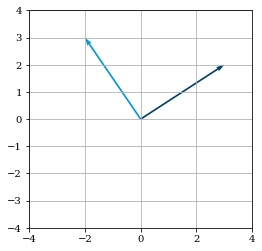

In [2]:
pyplot.figure(figsize=(4,4))
darkblue = '#004065'
lightblue = '#0096d6'
pyplot.quiver(0,0, 3,2, angles='xy', scale_units='xy', scale=1, color=darkblue)
pyplot.quiver(0,0, -2,3,angles='xy', scale_units='xy', scale=1, color=lightblue)
pyplot.xlim(-4,4)
pyplot.ylim(-4,4)
pyplot.grid(True);

We observe that multiplying by $i$ transformed the original complex number by rotating it counterclockwise by 90 degrees. This is an important observation!

If you think about any unit vector (let's draw a unit circle), with coordinates $(\cos{\theta}, \sin{\theta})$, the effect of a rotation by 90 degrees is always to swap the coordinate values and flip the sign of the first coordinate, to give: $(-\sin{\theta}, \cos{\theta})$. Multiplying by $i$ has the same effect. Neat.

<img src="../images/unitcircle_rot.png" style="width: 300px;"/>

#### A rotation by 90 degrees on the unit circle.

##### Think about this

> Looking at the figure above, what complex number do we multiply by to get a rotation by $\pi/6$ (i.e., 30 degrees)?

On the unit circle, start on the real line and you see that to rotate by $\pi/6$ we need a multiple of:  $\cos{\frac{\pi}{6}} + i \sin{\frac{\pi}{6}} $.

Now look what happens when you multiply the real number $1$ by $i$, and then by $i$ again. As shown on the sketch below, rotating counterclockwise by 180 degrees takes $1$ to $-1$. That is equivalent to multiplying by $i$ twice, i.e., $i^2=-1$.

<img src="../images/real_imag_rot.png" style="width: 300px;"/>

We could also rotate twice in the clockwise direction, or multiply by $-i$ twice, to obtain the same result, so in fact there are two square roots of $-1$: $i$ and $-i$. 

##### Think about this

> Rotating first by $\alpha$ and then by $\beta$ is like multiplying by two complex numbers:  $(\cos\alpha + i\sin\alpha)(\cos\beta + i\sin\beta)$.
> That is the same as rotating by $(\alpha+\beta)$, or multiplying by $\cos{(\alpha+\beta)} + i\sin{(\alpha+\beta)}$.

We re-discover the trigonometric identities for the cosine and sine of a sum of two angles! You can distribute the multiplication, and the match real and imaginary parts.

## Play with complex numbers in Python

Let's explore what we've learned by playing with Python complex numbers. 
In Python, the imaginary unit is represented by the letter `j` rather than `i`. This is probably because of the widespread use of the variable name `i` as a counter or index. 

Define a complex number $z= 3+2i$ as follows:

In [3]:
z = 3+2j

We can check the type of this new Python variable `z`:

In [4]:
type(z)

complex

Yes! The built-in `complex` Python data type. We can obtain the real and imaginary parts of a Python complex number using the dot notation for attributes:

In [5]:
z.real

3.0

In [6]:
z.imag

2.0

Python knows how to add or multiply complex numbers. Let's try it. Multiply `z` by the imaginary unit—which is represented in Python by `1j`, don't forget—to confirm the result we got before.

In [7]:
1j*z

(-2+3j)

In [8]:
(1+2j) + (2+1j)

(3+3j)

We can also create a complex number from two real numbers using `complex()`:

In [9]:
complex(1,1)

(1+1j)

### Functions of complex numbers

Python has a module called [`cmath`](https://docs.python.org/3.6/library/cmath.html#module-cmath) that provides functions of complex numbers. Let's play with it.

Visualize a complex number with real and imaginary parts $(a, b)$. What angle does it form with the positive real axis? This angle is called the **phase** of the complex number.

Look at the figure of the unit circle above: the vector $(a, b)$ intersects the circle at point $(\sin\theta, \cos\theta)$, so the angle must be: 

$$\theta= \tan^{-1}\left(\frac{b}{a}\right)$$

Where $\tan^{-1}$ is the inverse tangent, or arctangent. To give the angle in the correct quadrant, computer programs use the "2-argument arctangent," a function that takes the two arguments $a$, and $b$, with their sign.

NumPy has a built-in function [`numpy.arctan2()`](https://docs.scipy.org/doc/numpy/reference/generated/numpy.arctan2.html) that we can use with the real and imaginary parts of a complex number:

In [10]:
numpy.arctan2(z.imag, z.real)

0.5880026035475675

Pay attention! The first argument to `numpy.arctan2()` is the imaginary part of the complex number, i.e., the vertical coordinate (make a sketch on some paper if this is confusing).

We can also get the phase of a complex number using the built-in function from the `cmath` module, which by the way, includes several constants, like $\pi$:

In [11]:
import cmath
cmath.pi

3.141592653589793

In [12]:
cmath.phase(z)

0.5880026035475675

The returned angle is given in radians, in the range between $\pi$ and $-\pi$. If you want the result in degrees, you can convert with `numpy.degrees()`.

What is the complex number that forms the _negative_ angle, $-\theta$, with the real axis? That number is obtained by flipping the sign of the imaginary part to negative, and is called the **complex conjugate** of $z$, i.e., $a - ib$. Python of course can give us that.

In [13]:
numpy.degrees(cmath.phase(1j))

90.0

In [14]:
z.conjugate()

(3-2j)

The conjugate is denoted by a bar on the symbol representing the complex number: $\bar{z}$.

The absolute square of a complex number is defined as:

$$|z|^2 = z\bar{z}$$

and its **modulus** is defined as:

$$|z| = \sqrt{z\bar{z}} = \sqrt{a^2+b^2}$$

As you can see, the modulus corresponds to the distance from the origin to the point $(a, b)$ on the complex plane. Python computes it with the `abs()` function:

In [15]:
abs(z)

3.605551275463989

In [16]:
abs(1j)

1.0

In [17]:
w = 1+1j
abs(w)

1.4142135623730951

In [18]:
cmath.phase(w)

0.7853981633974483

In [19]:
numpy.degrees(cmath.phase(w))

45.0

Since the phase of a complex number is the angle it makes with the positive real axis, and the modulus is the distance from the origin to the complex number on the plane, the pair $(|z|, \theta)$ uniquely defines $z$. This is called the **polar representation**. We can obtain it in Python:

In [20]:
cmath.polar(w)

(1.4142135623730951, 0.7853981633974483)

Conversely, if you know the phase angle and the modulus, Python can give you the coordinates of the complex number with `cmath.rect()` (named for _rectangular_). The first argument is the modulus:

In [21]:
cmath.rect(1, cmath.pi/4)

(0.7071067811865476+0.7071067811865475j)

##### Exercise

- Create two Python variables taking the names `w1` and `w2`, assigning them complex values given by moduli $3$ and $5$, and phases $45^\circ$ and $15^\circ$, respectively. 
- Multiply the two complex numbers, and write the answer in polar representation. 
- What is the modulus of the result?
- What is the phase of the result in degrees?

## Euler's formula

You may have seen it before, and even used it in your math and physics classes, but perhaps you're still perplexed by **Euler's formula**: 

$$e^{i\alpha} = \cos(\alpha) + i\sin(\alpha)$$

What does it even mean to write $e^{i\alpha}$? What we're looking at is the extension of the exponential function to imaginary numbers. Remember that the symbol $e^x$ represents the _infinite sum_ (a.k.a., series):

$$ \exp(x) = 1 + x + \frac{x^2}{2!} + \frac{x^3}{3!} + \cdots + \frac{x^n}{n!}+ \cdots $$

Let's write a Python function to compute that. We'll need the `math` library to gain access to `math.factorial()`.

In [22]:
import math

In [23]:
def exponential(x,N=50):
    '''Approximates the exponential of x by adding the first N terms of the series'''
    longsum = 0
    for n in range(N):
        longsum += x**n /  math.factorial(n)
        
    return longsum

In [24]:
exponential(1)

2.7182818284590455

In [25]:
exponential(2)

7.389056098930649

In [26]:
exponential(0)

1.0

Playing around with this function for a long time, you might stumble on a very special property:

In [27]:
exponential(1+2)

20.08553692318766

In [28]:
exponential(1)*exponential(2)

20.085536923187664

This is not obvious from looking at the series, but in fact:

$$\exp(a+b) = \exp(a)\exp(b)$$

which is funny and lets you write: $\exp(3)= \exp(1+1+1) = \exp(1)\exp(1)\exp(1) = \exp(1)^3$ and finally express the result as $e^3$, where $e$ is $\exp(1)$. 

And that's how we come about that quirky number $e$! It's available in the `cmath` library, as shown below. In general, we thus write: $\exp(x)=e^x$.

In [29]:
cmath.e

2.718281828459045

We could expand the definition of the exponential function to imaginary numbers, because at the core it is an infinite polynomial sum—it only requires multiplication and addition. But an interpretation as the number $e$ raised to an exponent no longer works. We are stuck with the same notation, which is unhelpful. Look, even our custom Python function works with imaginary arguments:

In [30]:
exponential(1j)

(0.5403023058681397+0.8414709848078965j)

In [31]:
exponential(2j)

(-0.41614683654714246+0.9092974268256817j)

As you can see, the result is always a complex number. For any multiple of the imaginary unit, the series is:

$$ \exp(i\alpha) = 1 + i\alpha + \frac{(i\alpha)^2}{2!}+ \frac{(i\alpha)^3}{3!}+ \frac{(i\alpha)^4}{4!}+ \cdots$$

On the complex plane, we are starting on $(1,0)$ (the real number $1$). As a first example, suppose $\alpha$ is not too big: $2$ or less. We add $i\alpha$ (which steps vertically upwards on the plane), then add $i^2 \alpha^2/2= -\alpha^2/2$ (which steps horizontally to the left on the plane), and successively add vertical and horizontal vectors that get smaller and smaller to converge onto a _point on the unit circle_ at the angle $\alpha$. That point has coordinates $(\cos\alpha, \sin\alpha)$—and *that* is what Euler's formula says!

If you need help visualizing this, we recommend the [video on Euler's formula](https://www.youtube.com/watch?v=ZxYOEwM6Wbk) by Grant Sanderson, streamed live in April 2020.

As shown on the sketch below, the result is that after adding up all the terms in the series, the exponential of $i\alpha$ lands on the complex number $(\cos\alpha, \sin\alpha)$ on the unit circle.

<img src="../images/Eulers_formula.png" style="width: 300px;"/>

#### Euler's formula for a complex number on the unit circle.

When $\alpha=\pi$, Euler's formula gives the famous relation: $ e^{i\pi} = -1$.

Our custom Python function confirms this result (with some small floating-point error):

In [32]:
exponential(1j*cmath.pi)

(-1.0000000000000002+3.458669144327514e-16j)

In this case, if you look at the terms in the series, once we get to $n=4$, the denominator (with a factorial) grows faster than the numerator (a power of $\pi$), and the magnitude of all terms get smaller and smaller after that. The real and imaginary terms added go around (up, left, down, right), and converge to a point on the unit circle at angle $\pi$. Phew!

Euler's formula takes any input angle $\alpha$ and returns a complex number on the unit circle, $\cos\alpha + i\sin\alpha$. 
This means we can represent any complex number of the form $z=a+ib$ by a scaling of the vector $(\cos\alpha, \sin\alpha)$ with the value $r=|z|$. This leads to:

$$z=r\,e^{i\alpha}$$

where $\alpha$ is the phase of $z$. 

The polar representation of the complex number is the pair of values $(r, \alpha)$, obtained in Python using `cmath.polar()`. We can also make a plot of the complex number in polar representation.

Let's make a figure with both representations of the complex number $z$, as subplots.
On the left, we show $(3,2)$ on the Cartesian (rectangular) plane, and on the right we make a polar plot with $(r, \alpha)$.

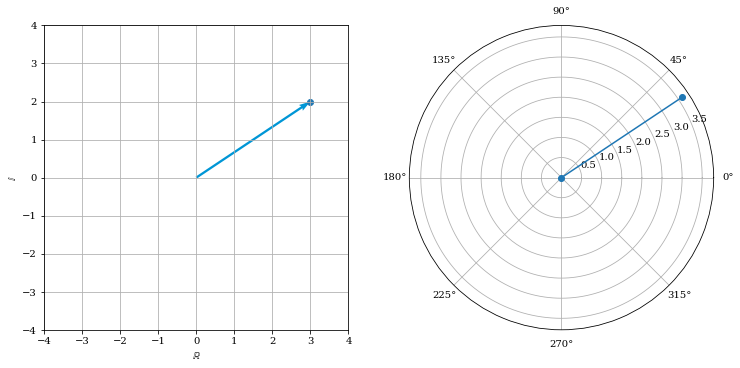

In [33]:
r, alpha = cmath.polar(z)

fig = pyplot.figure(figsize=(12,6))

ax1 = pyplot.subplot(121)
ax1.quiver(0,0, z.real,z.imag, angles='xy', scale_units='xy', scale=1, color=lightblue)
ax1.scatter(z.real, z.imag)
ax1.grid(True)
ax1.set_xlim(-4,4)
ax1.set_ylim(-4,4)
ax1.set_xlabel('$\mathbb{R}$')
ax1.set_ylabel('$\mathbb{I}$')
ax1.set_aspect('equal', 'box')

ax2 = pyplot.subplot(122, projection='polar')

ax2.plot([0,alpha],[0,r],marker='o');

#If you were plotting only a polar plot, the syntax is:
#pyplot.polar([0,alpha],[0,r],marker='o');


##### Exercise 

Choose multiple complex numbers, calculate their polar representation and plot them in a polar plot.

## Geometry of complex numbers

Complex numbers are two-dimensional as they live in a plane. Addition of complex numbers amounts to translation, and multiplication results in rotation. A complex number $z$ is rotated by angle $\theta$ by multiplying it with $e^{i\theta}$.

### The conjugate is a reflection

We introduced above the conjugate of a complex number $z=(r,\theta)$ as the number that makes an angle with the real axis of $-\theta$.
Taking the conjugate is thus a _reflection_ of $z$ over the real axis. 

<img src="../images/conjugate_circle.png" style="width: 300px;"/>

#### The conjugate is a reflection over the real axis.

Given a number $z = a+ib$, the complex conjugate $a-ib$ can be denoted $\bar{z}$ or $z^*$, depending on the context (the latter is common in physics). 

Using the conjugate, we write the real and imaginary parts of $z$ as:

$$\rm{Re}(z) = \frac{z+\bar{z}}{2}  \quad \text{and} \quad \rm{Im}(z) = \frac{z-\bar{z}}{2i}$$

If you are not convinced, take a pen and some paper and expand each term to work it out.

### Geometry of multiplication and De Moivre's formula

Consider two complex numbers in their polar representation: $z_1=r_1 e^{i\alpha_1}$ and $z_2=r_2 e^{i\alpha_2}$. Their multiplication is:

$$ z_1 z_2 = r_1 e^{i\alpha_1} r_2 e^{i\alpha_2} = r_1 r_2 e^{i(\alpha_1+\alpha_2)}$$

That is: multiply the muduli and add the phases. Geometrically, multiplication of two complex numbers is a combination of _scaling and rotation_.

This helps us visualize what happens when we apply the power $n$ to a complex number: take the power of the modulus, and add the phase angle $n$ times: $~r^n e^{in\alpha}$.

De Moivre's formula follows: 

$$[\cos(\alpha) + i\sin(\alpha)]^n = \cos(n\alpha) +i\sin(n\alpha)$$

for any real number $\alpha$ and integer $n$.

### Reciprocal and division 

Two complex numbers are reciprocal if their multiplication gives $1$. Geometrically, the product of their moduli is $1$ and the sum of their phases is the angle $0$—this means that the reciprocal is in the direction of the conjugate: it is a scaled reflection over the real axis.

<img src="../images/reciprocal.png" style="width: 300px;"/>

#### The reciprocal is a scaled reflection.

We find the reciprocal of a non-zero complex number $z = a + ib$ as:

$$\frac{1}{z} = \frac{\bar{z}}{z\bar{z}}=\frac{\bar{z}}{|z|^2}$$

Now we can write a division of two complex numbers $z_1/z_2$ as:

$$\frac{z_1}{z_2}= z_1 \frac{1}{z_2} = z_1\frac{\bar{z_2}}{|z_2|^2}$$

##### Exercise

Use Python operations to compare the left-hand side with the right-hand side of the real identity, the imaginary identity and the reciprocal definition defined above.

### Patterns $i^n$

Multiplying by $i$ is a 90-degree rotatation. Multiplingy by $i$ again results in a 180-degree rotaion, and twice again will eventually land on the same starting number.  

Let's print out the first few powers of $i$ to notice the pattern. We'll print a _formatted string_—using the `f` character before the quotes—which allows us to insert variables in the string that take the value at the moment of execution. To learn more about formated strings, read [Python 3: An Intro to f-strings](http://www.blog.pythonlibrary.org/2018/03/13/python-3-an-intro-to-f-strings/).

In [34]:
for i in range(8):
    res = (1j)**i
    print(f'i^{i} = {res}')

i^0 = (1+0j)
i^1 = 1j
i^2 = (-1+0j)
i^3 = (-0-1j)
i^4 = (1+0j)
i^5 = 1j
i^6 = (-1+0j)
i^7 = (-0-1j)


Pay attention to the output, and you'll see that the pattern follows as $[1, i, -1, -i]$ and it repeats. The successive rotations by 90 degrees, starting at $1$ ($i^0$) on the real axis, each four times ($i^4$) will land again on $1$, on the real axis.
Since $i^4=1$, you can reduce any power of $i$ by four without changing the result.

<img src="../images/power_i_pattern.png" style="width: 300px;"/>

##### Exercise

If we have $i^{355}$ how can we know what is the result of that operation without explicitly calculating it? 

Tips: 
- Think of the pattern
- You might want to check how the modulo operation works, the `%` symbol.

#####  Challenge

Write a function that computes any power of $i$ without directly computing it.

## References

1. Grant Sanderson (2020), ["Complex number fundamentals"](https://www.youtube.com/watch?v=5PcpBw5Hbwo) video on YouTube.
2. Grant Sanderson (2020), [What is Euler's formula actually saying?](https://www.youtube.com/watch?v=ZxYOEwM6Wbk)
2. Python documentation, [`cmath` library](https://docs.python.org/3/library/cmath.html)


In [35]:
# Execute this cell to load the notebook's style sheet, then ignore it
from IPython.core.display import HTML
css_file = '../style/custom.css'
HTML(open(css_file, "r").read())